<a href="https://colab.research.google.com/github/EricMarcantonio/Misc-Machine-Learning-Data-Analytics/blob/master/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: Using AI to predict 

In [0]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [0]:
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-12")


In [0]:
plt.figure(figsize=(16, 8))
plt.title("Close price history")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Price in USD $")
# plt.show()

In [0]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
dataset = data.values

#Get rows

training_data_len = math.ceil(len(dataset) * .8)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [0]:
#create the training data set
#created the scaled training set

train_data = scaled_data[0: training_data_len,:]
#split the data into x_train and y_train

x_train = []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  

In [0]:
#convert training datasets to np array
x_train, y_train = np.array(x_train), np.array(y_train)


In [0]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
#build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [0]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [0]:
#create the testing dataset

#create a new array

test_data = scaled_data[training_data_len-60: , :]

#create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert  the data to a np array
x_test = np.array(x_test)

#
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#get the models predicted price values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)


In [60]:
#get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test) **2)

rmse

4.27319076538086

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


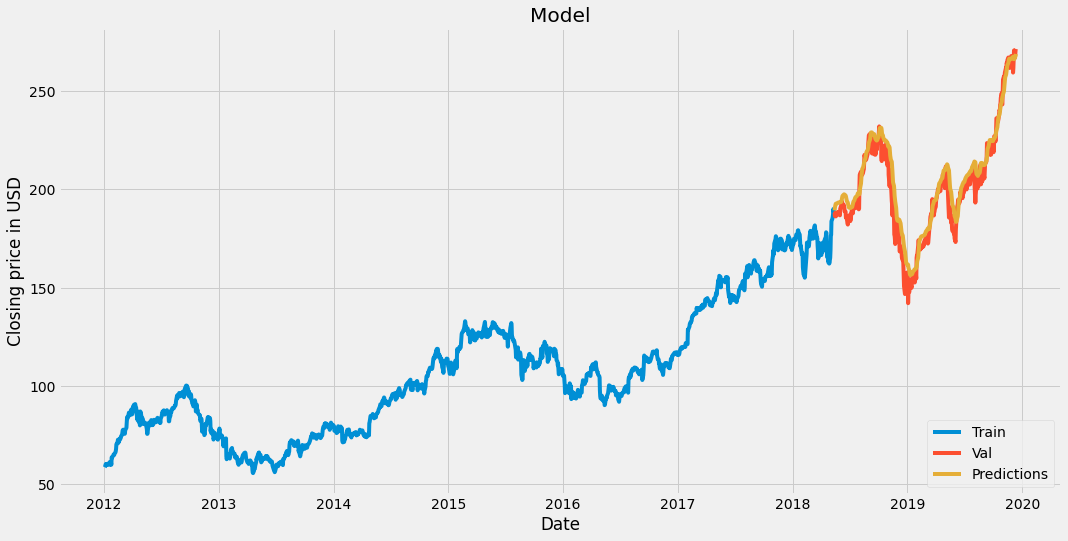

In [61]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")

plt.xlabel("Date")
plt.ylabel("Closing price in USD")

plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [0]:
#show the valid and predicted

valid

In [70]:
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-18")
new_df = apple_quote.filter(["Close"])
last_60_days = new_df[-60:].values

#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

pred_price[0][0]

276.11282

In [71]:
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2019-12-19", end="2019-12-19")
print(apple_quote2["Close"])

Date
2019-12-19    280.019989
Name: Close, dtype: float64
